# Clusterização com DBscan

## Importação das bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN, KMeans
from sklearn.neighbors import NearestNeighbors

#seed
seed = 0
np.random.seed(seed)

## Carregar base de dados

In [2]:
df = pd.read_csv('bi_data.csv', header=None)
df.head()

,0,1
0,-0.001364,0.994355
1,-0.001335,0.978548
2,-0.001308,0.963871
3,-0.001280,0.949193
4,-0.001251,0.933387


In [3]:
df.shape

(6046, 2)

##Visualizar base

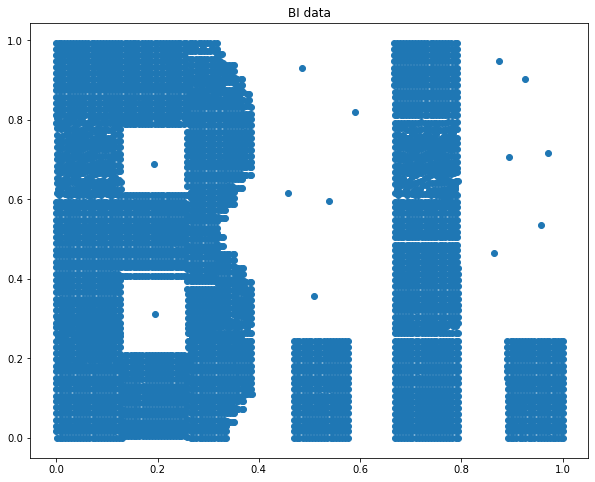

In [4]:
plt.figure(figsize=(10,8))
plt.scatter(x=df[0], y=df[1])
plt.title('BI data')
plt.show()

## Rodar DBscan
Parâmetros:
- eps: especifica como os pontos próximos devem ser considerados para serem considerados parte de um cluster.
Se pequeno, grande parte dos dados não será agrupada. 
Quanto maior, mais os clusters serão mesclados e a maioria dos objetos estará no mesmo cluster.

- min_samples: o número mínimo de pontos para formar uma região densa.
min_samples ??? D + 1. 
Valores maiores geralmente são melhores para conjuntos de dados com ruído. 


KNN
1. Para estimar os valores de 'eps' e 'min_samples', vamos utilizar o knn.
A ideia é calcular a distância média de cada registro para seus k vizinhos mais próximos. O valor de k deve ser especificado pelo usuário e corresponde ao 'min_samples'. 
2. Em seguida, as k-distâncias são plotadas em ordem. O objetivo é determinar o 'joelho', que corresponde ao parâmetro ótimo de 'eps'.

In [5]:
neighbors = 4
knn = NearestNeighbors(n_neighbors=neighbors).fit(df)
distances, indices = knn.kneighbors(df) #indice dos pontos mais próximos
distance = sorted(distances[:,neighbors-1]) # ordena a distancia para 4 vizinhos, indica começa com 0.

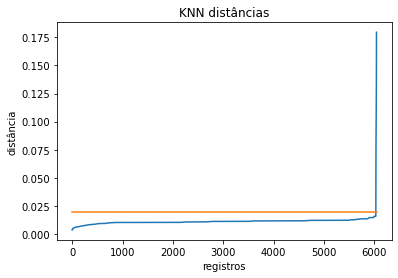

In [6]:
# Distancias ordenadas
plt.plot(indices[:,0], distance)
plt.title('KNN distâncias')
plt.xlabel('registros')
plt.ylabel('distância')

# Determinar o eps pelo joelho do gráfico
eps=0.02
plt.plot([0,len(df)], [eps, eps])

plt.show()

### DBscan

In [7]:
model = DBSCAN(eps=eps, min_samples=neighbors)
model = model.fit(df)

In [8]:
# Analisar quantidade de clusters e quantidade de registros em cada cluster
labels = model.labels_
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))
# Cluster -1 é ruído.

{-1: 13, 0: 3903, 1: 323, 2: 1467, 3: 340}

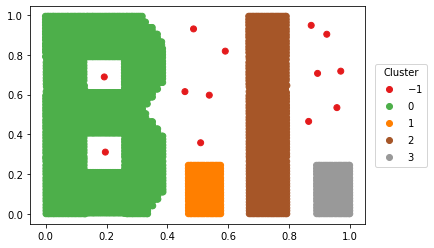

In [9]:
# Gráfico da separação dos grupos formados
fig = plt.scatter(x=df[0], y=df[1], c=model.labels_, cmap='Set1') #set1 mapa de cores qualitativo https://matplotlib.org/stable/tutorials/colors/colormaps.html
handles, lbls = fig.legend_elements(prop="colors")
plt.legend(handles, lbls, loc='center right', bbox_to_anchor=(1.2, 0.5), title='Cluster')
plt.show()

In [10]:
# Quais registros são ruído?
df[labels == -1]

,0,1
5670,0.486163,0.930649
5671,0.590654,0.818792
5672,0.537994,0.597315
5673,0.457886,0.615213
5674,0.509576,0.357942
5675,0.873466,0.948546
5676,0.924760,0.903803
5677,0.894400,0.706935
5678,0.970730,0.718121
5679,0.958036,0.534676


In [14]:
df_sem_ruido = df[labels != -1]

In [15]:
len(df_sem_ruido)

6033

In [16]:
len(model.labels_[model.labels_ !=-1])

6033

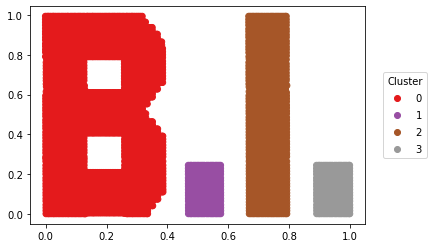

In [18]:
# Gráfico da separação dos grupos formados (sem ruído)
fig = plt.scatter(x=df_sem_ruido[0], y=df_sem_ruido[1], c=model.labels_[model.labels_ !=-1], cmap='Set1') #set1 mapa de cores qualitativo https://matplotlib.org/stable/tutorials/colors/colormaps.html
handles, lbls = fig.legend_elements(prop="colors")
plt.legend(handles, lbls, loc='center right', bbox_to_anchor=(1.2, 0.5), title='Cluster')
plt.show()

## Comparar com o Kmeans

In [19]:
kmeans = KMeans(n_clusters=4, random_state=seed) #quatro grupos
kmeans = kmeans.fit(df)

In [20]:
# Grupos de cada registro da base
kmeans.labels_

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [21]:
kmeans.cluster_centers_

array([[0.18510107, 0.23608457],
       [0.73526458, 0.17277306],
       [0.18115537, 0.7579386 ],
       [0.73141895, 0.72453664]])

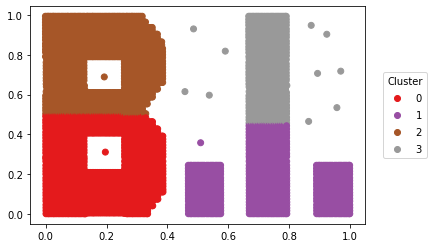

In [22]:
# Gráfico da separação dos grupos formados
fig = plt.scatter(x=df[0], y=df[1], c=kmeans.labels_, cmap='Set1')
handles, labels = fig.legend_elements(prop="colors")
plt.legend(handles, labels, loc='center right', bbox_to_anchor=(1.2, 0.5), title='Cluster')
plt.show()

## KNN (Finding the Nearest Neighbors)

fonte: https://scikit-learn.org/stable/modules/neighbors.html#unsupervised-neighbors

In [ ]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X) #calcula a distancia entre 2 pares
dist, ind = nbrs.kneighbors(X)

In [ ]:
plt.scatter(x=X[:,0], y=X[:,1])
plt.show()

In [ ]:
ind #mostra os pares de pontos mais próximos da matrix X, começado por 0 (primeiro ponto)

In [ ]:
dist

In [ ]:
dist[:,1]

In [ ]:
plt.plot(ind[:,0], sorted(dist[:,1]))
plt.show()